In [1]:
import rawpy
import numpy as np
from scipy.ndimage.filters import convolve

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.figsize"] = 10, 15

In [2]:
import glob

raws = []
rpyraws = []

ibp = np.asarray([float('inf') for i in range(3)])
iwp = np.zeros((3))
for i in sorted(glob.glob("../photos/positives/France 1976/*.NEF")):
# for i in sorted(glob.glob("../photos/negatives/Luke 2020/*.NEF")):
    # print(i)
    raw = rawpy.imread(i)
    # rpyraws.append(raw)
    # imcopy = raw.raw_image_visible.copy()
    # pog = np.concatenate((
    #     convolve((imcopy*(raw.raw_colors_visible==0)), H_RB)[:,:,np.newaxis],
    #     convolve((imcopy*(raw.raw_colors_visible%2)), H_G)[:,:,np.newaxis],
    #     convolve((imcopy*(raw.raw_colors_visible==2)), H_RB)[:,:,np.newaxis],
    # ), axis=2)
    # pog = raw.postprocess(output_bps=16, user_wb=[1, 1, 1, 1], gamma=(1, 1), no_auto_bright=True, user_flip=0)
    # pog = raw.postprocess(output_bps=16, gamma=(1, 1), user_flip=0)
    pog = raw.postprocess(output_bps=16, user_wb=[1, 1, 1, 1], gamma=(1, 1), no_auto_bright=True, user_flip=0)
    pog = pog/pog.max()
    ibp = np.minimum(np.percentile(pog[300:-300:10, 300:-300:10], 0.01, axis=(0, 1)), ibp)
    iwp = np.maximum(np.percentile(pog[300:-300:10, 300:-300:10], 99.9, axis=(0, 1)), iwp)
    # pog = pog/pog.max()
    # print(pog.shape)
    raws.append(pog)
raws=np.asarray(raws)

In [3]:
# mbright = np.percentile(raws[:, 500:-500:50, 500:-500:50], 99.9)
# print(mbright)

# rawsgamma=raws/mbright
# rawsgamma.shape
# ibp = ibp/raws.max()
# iwp = iwp/raws.max()
# rawsgamma = raws/raws.max()
# wbds = np.clip((1-raws/raws.max()), 0, 1)

[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.89187665 0.63257796]
[0.         0.00099592 0.        ]
[0.1643975  0.891876

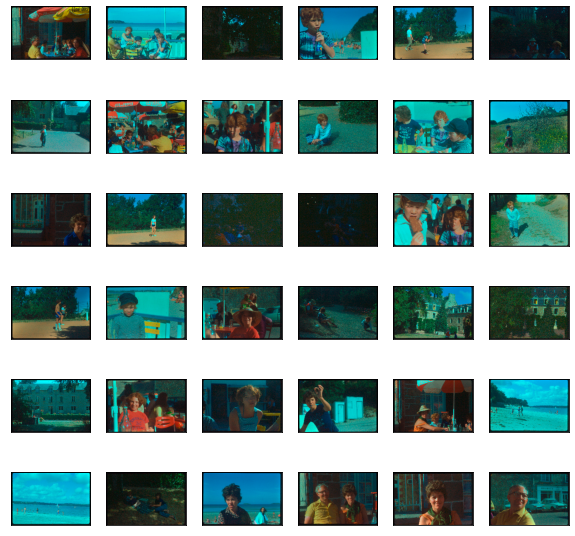

In [4]:
# plt.imshow(n[0][0].permute(1, 2, 0))
plt.figure(figsize=(10,10))


# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))
# print("wbs calc")
number = 36
offset = 0
outputs = []
for i in range(len(raws))[:number]:
    gridsize = number**0.5//1+(number**0.5%1>0)*1
    plt.subplot(gridsize, gridsize,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # pog = rawsgamma[i + offset] 
    
    # pogmed = np.median(pog, (0, 1))
    # print(i)
    # toshow = (pog[::,::]-pogawbb)/(pogawbw-pogawbb)
    # print(toshow.max(), toshow.min())

    wbd = np.clip((raws[i]), 0, 1)
    # wbd = wbds[i]
    # low = np.percentile(wbd[300:-300:10, 300:-300:10], 0.001, axis=(0, 1))
    # high = np.percentile(wbd[300:-300:10, 300:-300:10], 99.999, axis=(0, 1))
    high  = ibp 
    low = iwp * [3, 1, 1]
    high, low = low, high
    print(high)
    print(low)
    # toshow = wbd
    toshow = ( wbd -  low)/(high - low)
    toshow = np.clip(toshow, 0,1)**(1/2.2)
    outputs.append(toshow)
    plt.imshow(toshow[::30, ::30]*[1, 1, 1])

[1.         0.99900408 1.        ] [0.8356025  0.10812335 0.36742204]
[1.         0.99900408 1.        ] [0.8356025  0.10812335 0.36742204]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


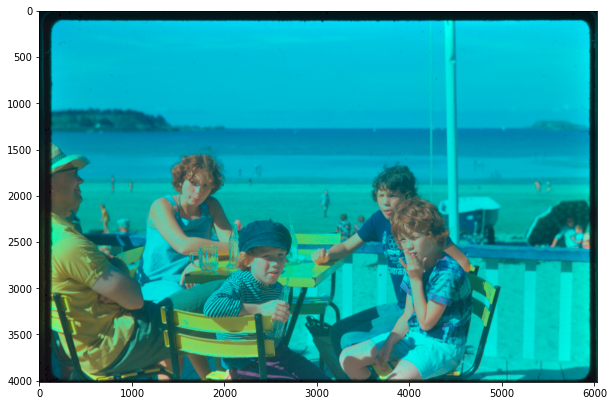

In [5]:
item = np.clip((1-raws[1]), 0, 1)
print((1-ibp), (1-iwp))
high = (1-ibp) + [0, 0, 0]
low  = (1-iwp) + [0, 0, 0]
# [0.93037786 0.88133673 0.97314734]
print(high, low)
high, low = low, high
toshow = ( item -  low)/(high - low)
toshow = toshow**(1/2.2)
plt.imshow(toshow)

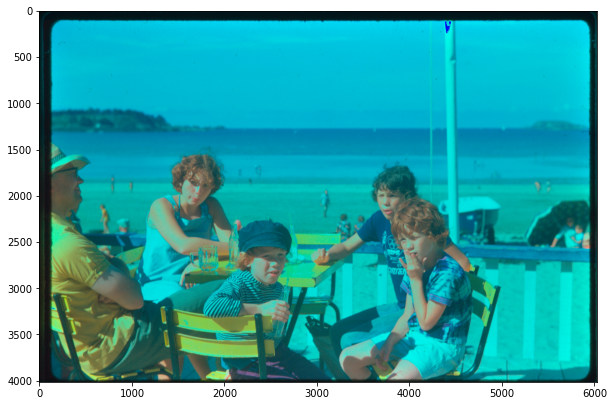

In [6]:
import cv2
enc = cv2.imencode(".jpg", (toshow*255).astype(np.uint8))
dec = cv2.imdecode(enc[1], cv2.IMREAD_COLOR)
plt.imshow(dec)

In [7]:
(2**10)**2*100

104857600

In [8]:
hasattr(np, "zeros")
np.zeros

<function numpy.zeros>

In [9]:
np.zeros((3,2)).max(axis=(0))

array([0., 0.])